In [1]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/navdeep/Documents/FINAL PROJECT DOCUMENTS/healthcare-dataset-stroke-data.csv')
# df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
#This method is used for returning top n (by default value 5) rows of a data frame or series.
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
# drop unnecessary columns
df.drop(["id"], axis = 1, inplace = True)
#This method is used for returning top n (by default value 5) rows of a data frame or series.
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [5]:
# data info: columns with data types,This Method prints the information or summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
#The describe() method is used for calculating some statistical data like percentile, mean and std of the DataFrame.
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [7]:
# Converting 'object' Coulmns to 'integer'
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# bmi column seems it has null values. Let's check it out!
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#Dealing with the missing values we use the mean to take the average of the column and.
#median for the middle term that can only be done with numerical value.
# Mode it is required for taking the maximum number.

print(df['bmi'].mean())
print(df['bmi'].median()) # even form
print(df['bmi'].mode())# odd form

28.893236911794673
28.1
0    28.7
Name: bmi, dtype: float64


In [10]:
bmi_mean=df['bmi'].mean()
df['bmi']=df['bmi'].fillna(bmi_mean)


In [11]:
# Here we again check that is there any missing values are found or not.
df['bmi'].isnull().sum()

0

In [16]:
df.shape

(5110, 11)

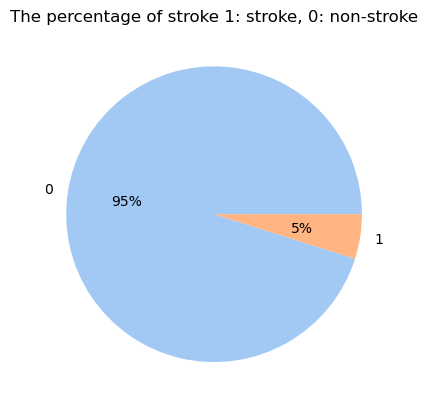

In [17]:
data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

palette_color = sns.color_palette("pastel")
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("The percentage of stroke 1: stroke, 0: non-stroke");



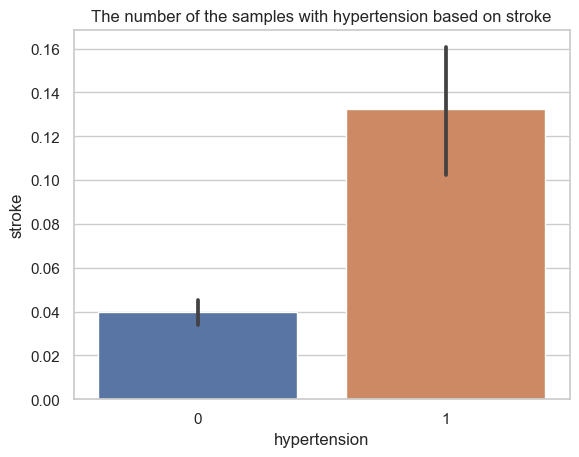

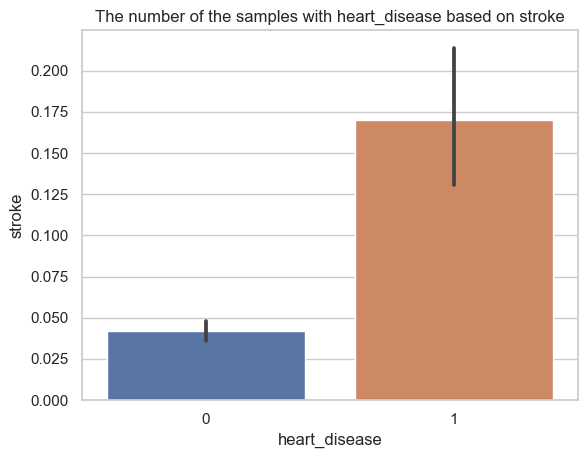

In [12]:
#Issues:
#There is 201 null BMI values on the dataset. 
#Additionally the data is imbalance therefore we need to solve these issues for better results.
#Data Visualization
# Categorical Feature(Barplot)...........................


# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'whitegrid')
for i in df.columns[:-1]:  # exclude stroke column
    if i == 'hypertension' or i == 'heart_disease'  :
            sns.barplot(data = df, x = i, y = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

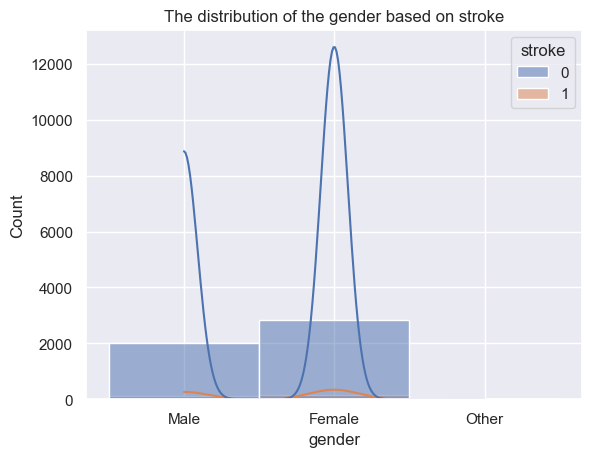

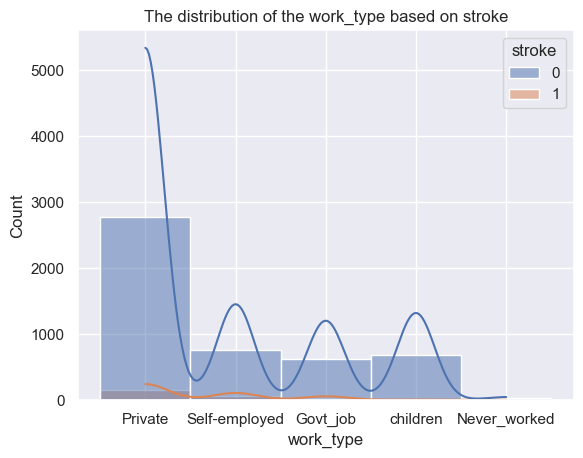

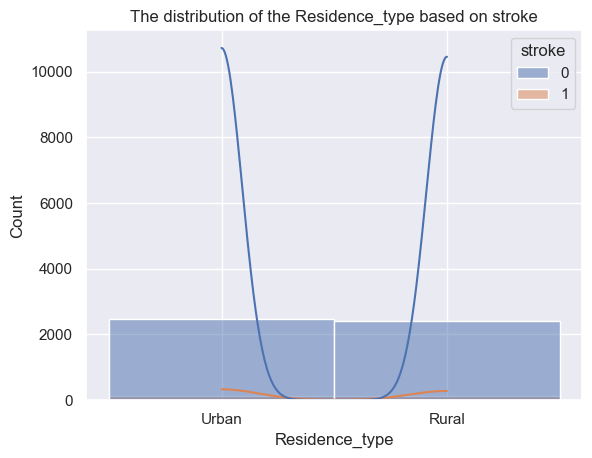

In [13]:
# Object Features
sns.set_theme(style = 'darkgrid')
for col in df.columns: # exclude stroke column
    if col == 'gender' or col == 'work_type'or col == 'Residence_type' :
            sns.histplot(data = df, x = col, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(col))
            plt.show()

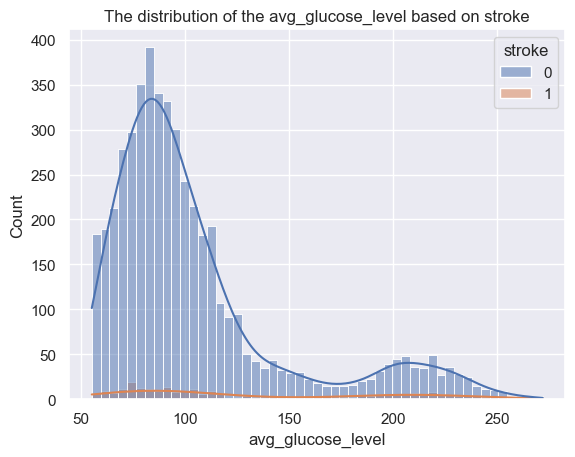

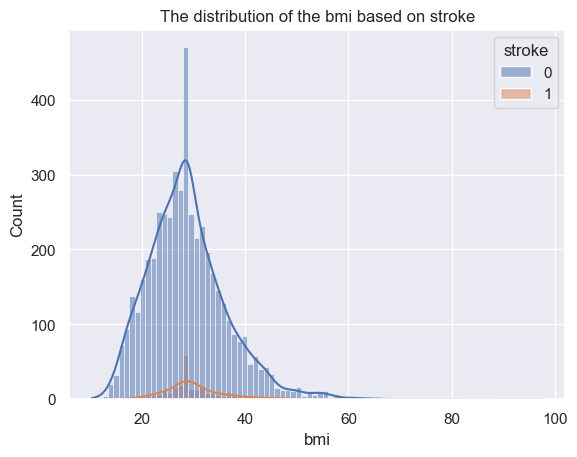

In [14]:
# a short look into numeric variables like bmi, avg_glucose_level and age
sns.set_theme(style = 'darkgrid')
for col in df.columns: # exclude stroke column
    if col == 'bmi' or col == 'avg_glucose_level':
            sns.histplot(data = df, x = col, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(col))
            plt.show()

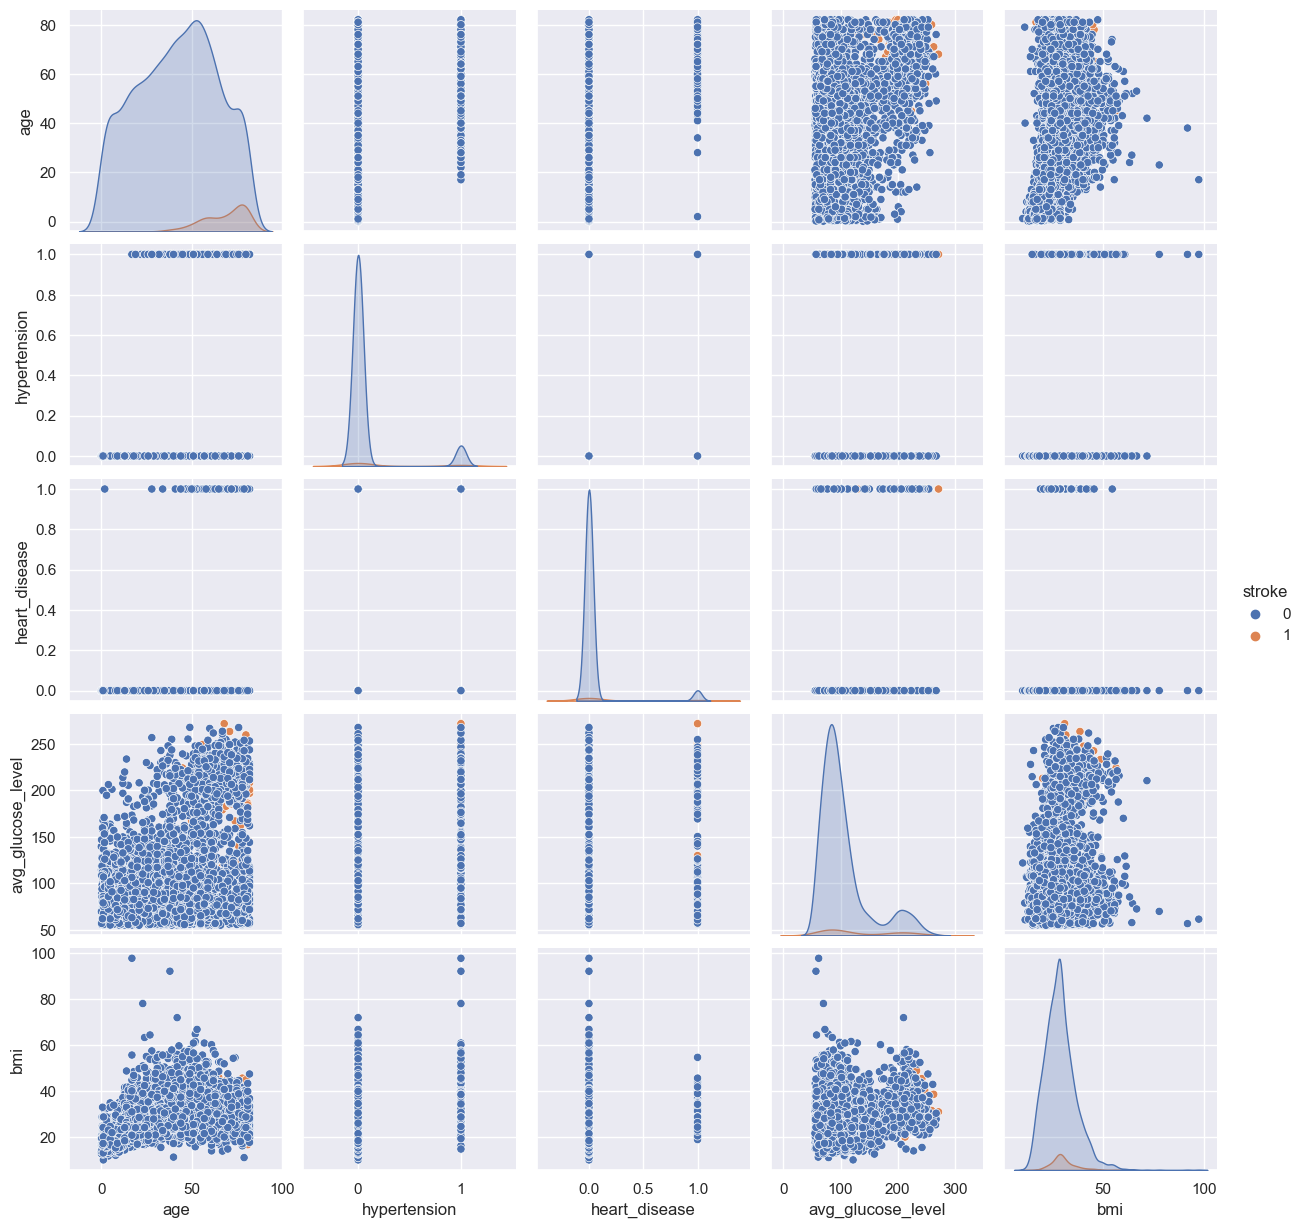

In [15]:
sns.pairplot(data=df,hue='stroke')

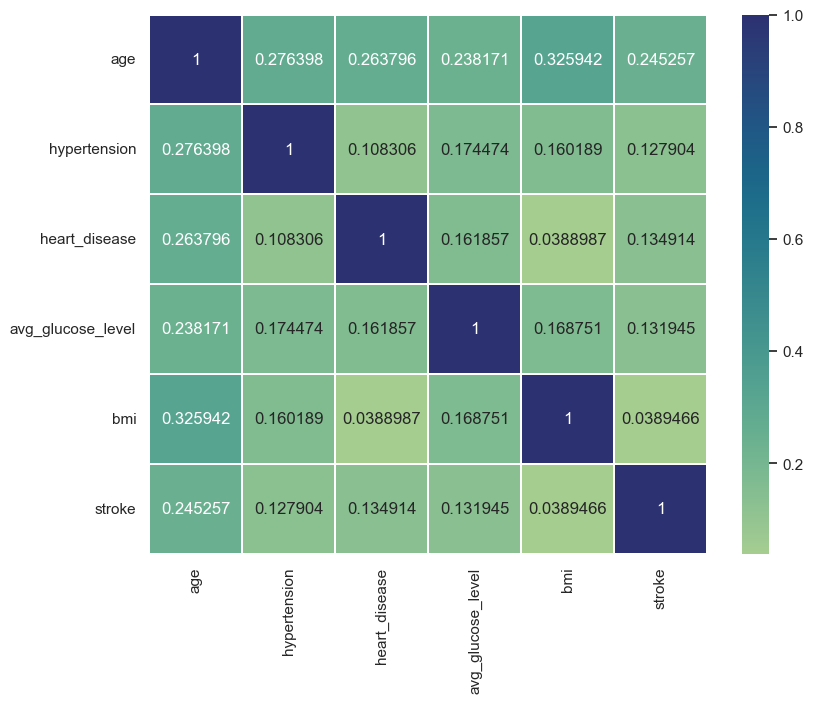

In [16]:
# Heatmap..................

fig = plt.figure(figsize=(9,7))
corr = df.corr()
ax = sns.heatmap(corr, linewidths=.2, cmap="crest", annot=True, fmt="g")

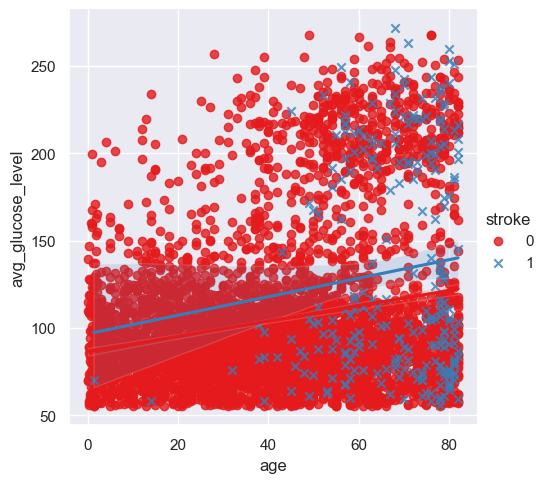

In [17]:
# Numerical Features............
def cnditioning_linear_plot(x,y,hue,df):
    sns.lmplot(x=x, y=y, hue=hue, data=df,
               markers=["o", "x"], palette="Set1")

    
cnditioning_linear_plot('age','avg_glucose_level','stroke',df)

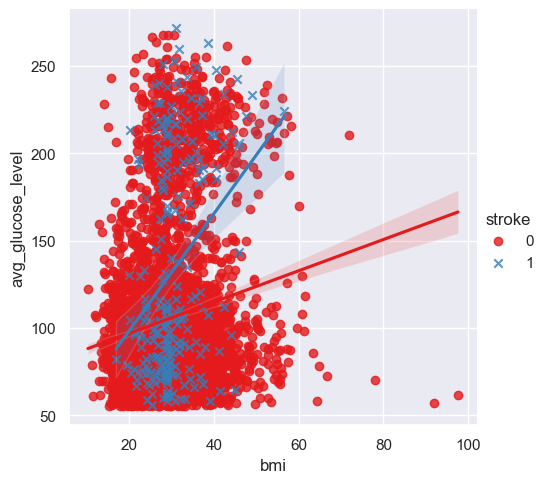

In [18]:
cnditioning_linear_plot('bmi','avg_glucose_level','stroke',df)

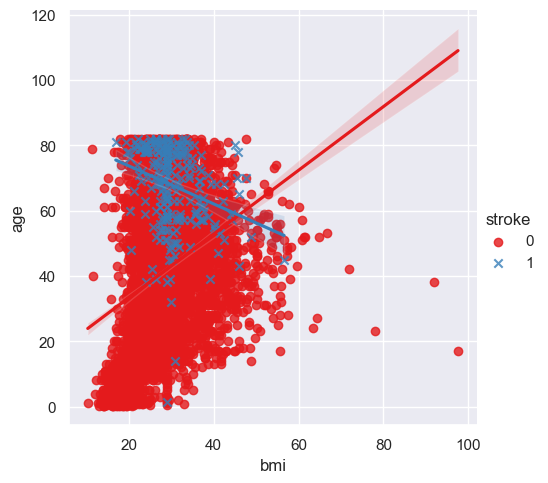

In [19]:
cnditioning_linear_plot('bmi','age','stroke',df)


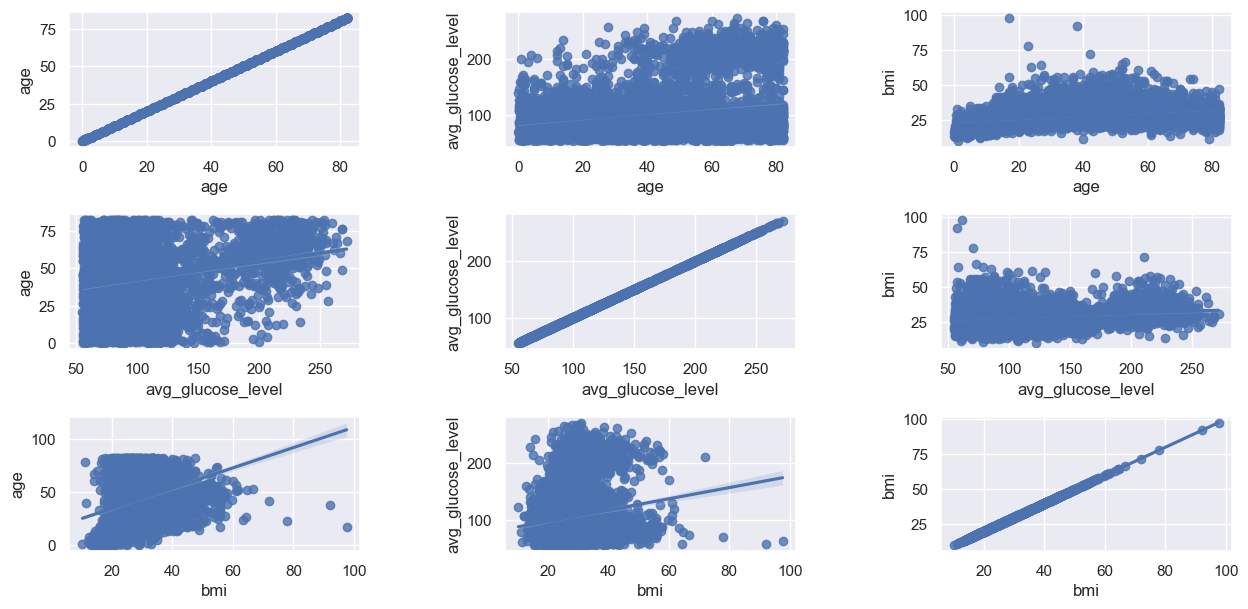

In [20]:
# Correlation Analysis

plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','avg_glucose_level','bmi']:
    for y in ['age','avg_glucose_level','bmi']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  
        sns.regplot( x = x, y = y,data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

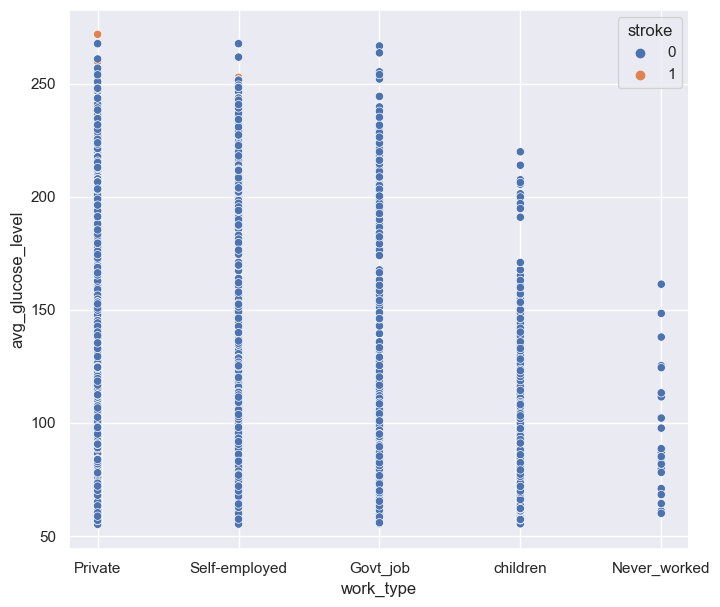

In [21]:
# scatterplot to visualize each numerical variables by stroke
plt.figure(figsize = (8, 7))

sns.scatterplot(data=df, x ="work_type",  y="avg_glucose_level", hue="stroke")
plt.show()

In [22]:
#Encoding.............

binary_cols = [col for col in df.columns if df[col].dtype in [object]]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [23]:
binary_cols


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [24]:
for col in binary_cols:
    label_encoder(df, col)

In [25]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

In [26]:
#label encoding
labelencoder = LabelEncoder()

In [27]:
df["bmi"] = labelencoder.fit_transform(df["bmi"])
df["avg_glucose_level"] = labelencoder.fit_transform(df["avg_glucose_level"])


In [28]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0               1               3850  240               1       1  
1               0               3588  162               2       1  
2               0               2483  199               2       1  
3               1               3385  218               3       1  
4               0               3394  113               2       1

In [29]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

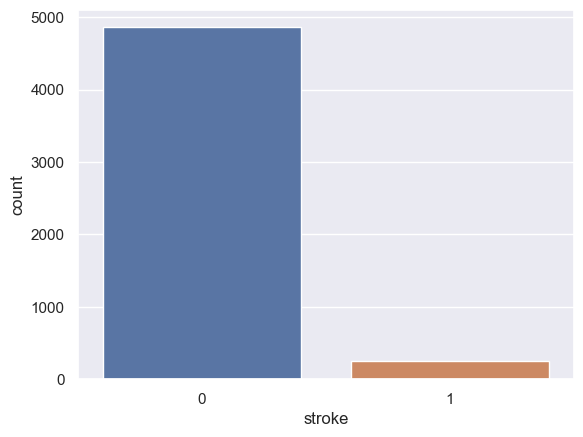

In [30]:
sns.countplot(x='stroke', data=df) 

In [31]:
#SMOTE TECHNIQUE.........................
# Split data into separate training and test set
#Oversampling with Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
X, y = df.iloc[:, 0:-1], df.iloc[:, -1:]

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print("After Oversampling, the counts of label 1: ", y.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y.value_counts()[0])

Before Oversampling, the counts of label 1:  249
Before Oversampling, the counts of label 0:  4861
After Oversampling, the counts of label 1:  4861
After Oversampling, the counts of label 0:  4861


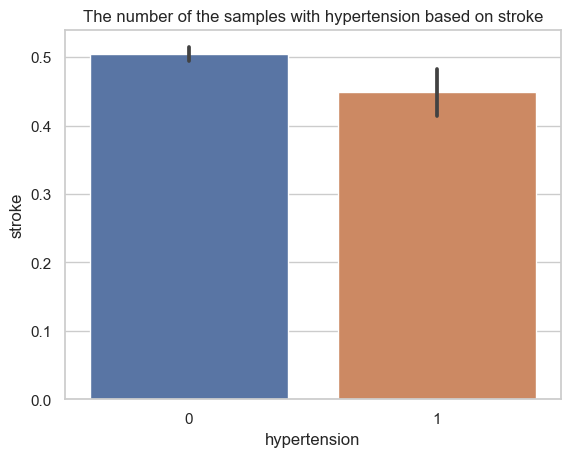

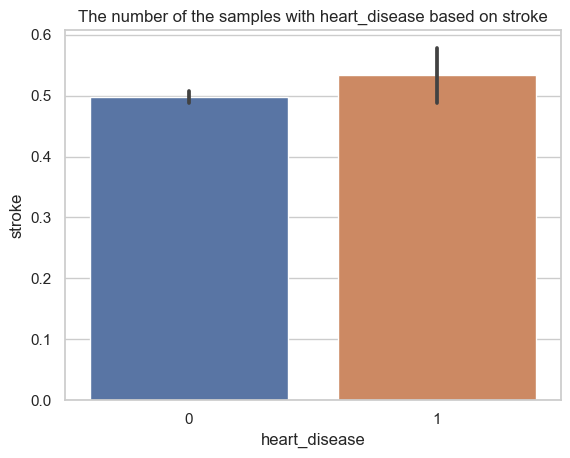

In [32]:
# visualization after SMOTE

# Numeric Features after visualization........................
df = pd.concat([X, y], axis = 1)

# a short look into the number of each categorical features grouped by stroke variable.

sns.set_theme(style = 'whitegrid')
for i in df.columns[:-1]:  # exclude stroke column
    if i == 'hypertension' or i == 'heart_disease'  :
            sns.barplot(data = df, x = i, y = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()           

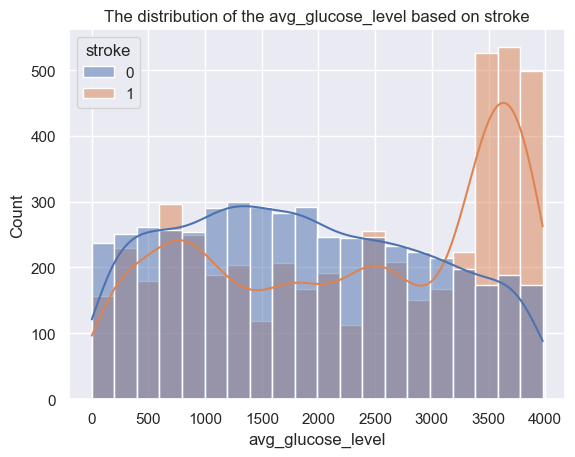

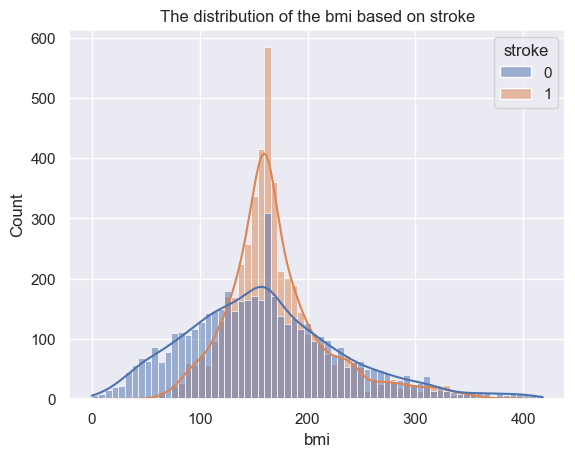

In [33]:
# Float features after visualization...............
df = pd.concat([X, y], axis = 1)

sns.set_theme(style = 'darkgrid')
for col in df.columns: # exclude stroke column
    if col == 'bmi' or col == 'avg_glucose_level':
            sns.histplot(data = df, x = col, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(col))
            plt.show()
        

In [34]:
#preprocessing :-

# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

# Initialize One Hot Encoder
one_hot_encoder = OneHotEncoder()
# Fit and Transform the columns
df_temp = one_hot_encoder.fit_transform(df[['gender', 'ever_married','work_type','smoking_status', 'Residence_type']]).toarray()

# Get newly encoded columns and concat them to the Dataframe
encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
df = pd.concat([df,encodings] , axis=1)

# Drop original columns from the dataset after encoding is done
df.drop(['gender', 'ever_married', 'work_type','smoking_status','Residence_type'],axis = 1, inplace=True)
df.head()

age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  \
0  67.0             0              1               3850  240       1   
1  61.0             0              0               3588  162       1   
2  80.0             0              1               2483  199       1   
3  49.0             0              0               3385  218       1   
4  79.0             1              0               3394  113       1   

   gender_0  gender_1  gender_2  ever_married_0  ...  work_type_1  \
0         0         1         0               0  ...            0   
1         1         0         0               0  ...            0   
2         0         1         0               0  ...            0   
3         1         0         0               0  ...            0   
4         1         0         0               0  ...            0   

   work_type_2  work_type_3  work_type_4  smoking_status_0  smoking_status_1  \
0            1            0            0                 0                 1   
1            0            1            0                 0                 0   
2            1            0            0                 0                 0   
3            1            0            0                 0                 0   
4            0            1            0                 0                 0   

   smoking_status_2  smoking_status_3  Residence_type_0  Residence_type_1  
0                 0                 0                 0                 1  
1                 1                 0                 1                 0  
2                 1                 0                 1                 0  
3                 0                 1                 0                 1  
4                 1                 0                 1                 0  

[5 rows x 22 columns]

In [35]:
#Split the data:-
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

In [40]:
X = df.drop(['stroke'],axis=1)
y = df['stroke'].to_frame()

In [41]:
# Split data into separate training and test set
X_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [42]:
#Scaling
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)

In [43]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [44]:
# Apply oversampling
oversample = SMOTE()
X_balanced,y_balanced = oversample.fit_resample(X, y.ravel())

1    4861
0    4861
Name: stroke, dtype: int64


<AxesSubplot:>

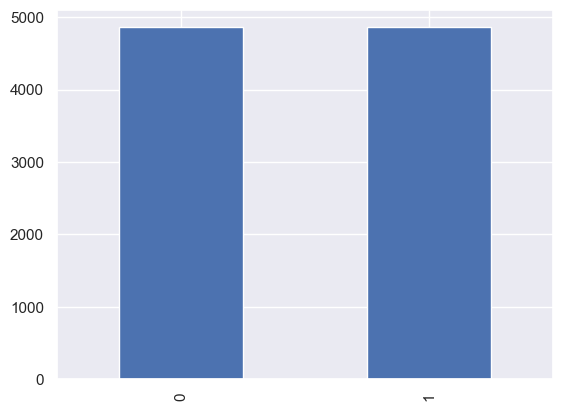

In [45]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

In [46]:
#Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [47]:
#Model Building
#DataFrame for Models Accuracy Score
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

 XGBOOST Classifier is: 0.8798848210612916
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1220
           1       0.82      0.97      0.89      1211

    accuracy                           0.88      2431
   macro avg       0.89      0.88      0.88      2431
weighted avg       0.89      0.88      0.88      2431



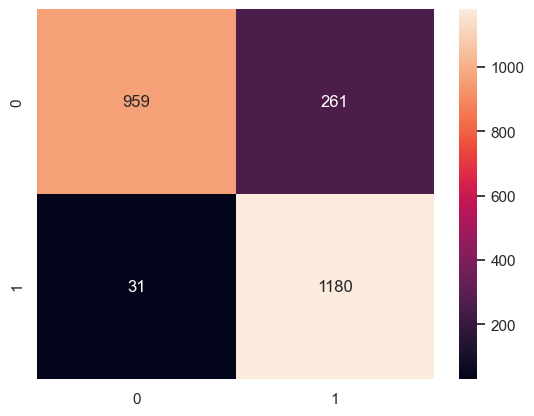

In [48]:
#Build theXGBOOST MODEL and evalute the model:-

# import the XGBoost classifier
from xgboost import XGBClassifier

#Create a XGBOOST Model
xgb = XGBClassifier()

#Train the model using the training sets
xgb.fit(X_train, y_train)

#Predict the response for test dataset
xgb_pred = xgb.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = xgb.score(x_test, y_test)
print(" XGBOOST Classifier is:",acc)
report = classification_report(y_test, xgb_pred)
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)


In [49]:
new_row = {"Model Name":"XG BOOST", "Accuracy Score":acc}
model_df = model_df.append(new_row, ignore_index=True)

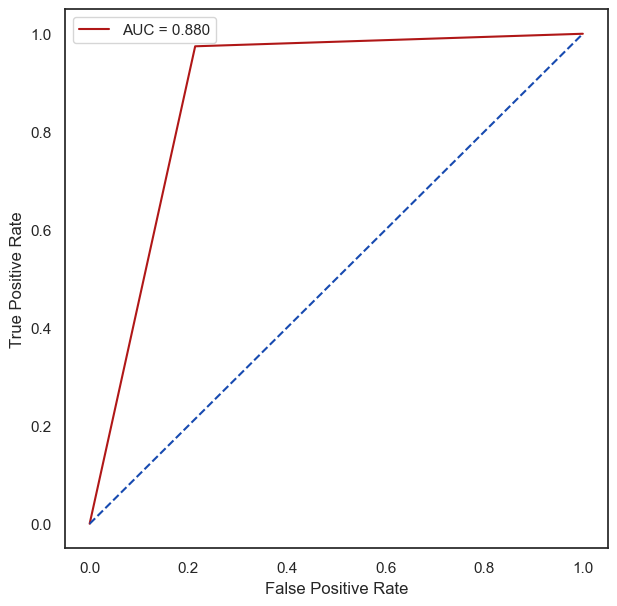

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, xgb_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (7, 7))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

 Support Vector Classifier is: 0.8634306869600987
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1220
           1       0.84      0.89      0.87      1211

    accuracy                           0.86      2431
   macro avg       0.86      0.86      0.86      2431
weighted avg       0.86      0.86      0.86      2431



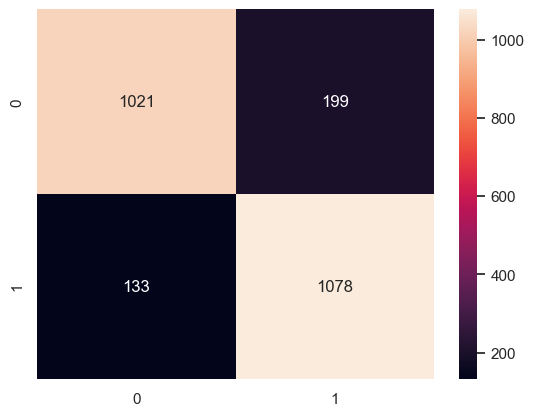

In [51]:
#Build the Support Vector Machine and evalute the model 

#import the support vector classsifier
from sklearn.svm import SVC

#Create a Support Vector Classifier
svc = SVC()

#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
svc_pred = svc.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = svc.score(x_test, y_test)
print(" Support Vector Classifier is:",acc)
report = classification_report(y_test, svc_pred)
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)


In [52]:
new_row = {"Model Name":"Support Vector Classifier", "Accuracy Score":acc}
model_df = model_df.append(new_row, ignore_index=True)

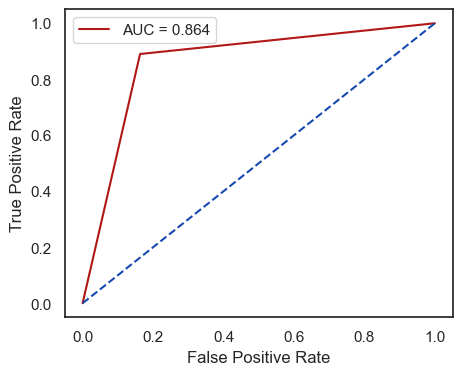

In [53]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (5, 4))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

 Decision Tree Classifier is: 0.8934594816947758
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1220
           1       0.88      0.91      0.90      1211

    accuracy                           0.89      2431
   macro avg       0.89      0.89      0.89      2431
weighted avg       0.89      0.89      0.89      2431



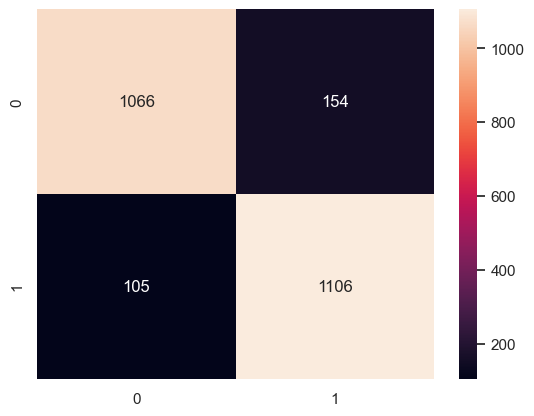

In [54]:
#Build the Decision Tree and evalute the model
dt = DecisionTreeClassifier()
#Train the model using the training sets
dt.fit(X_train, y_train)

#Predict the response for test dataset
dt_pred = dt.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = dt.score(x_test, y_test)
print(" Decision Tree Classifier is:",acc)
report = classification_report(y_test, dt_pred)
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)


In [55]:
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":acc}
model_df = model_df.append(new_row, ignore_index=True)

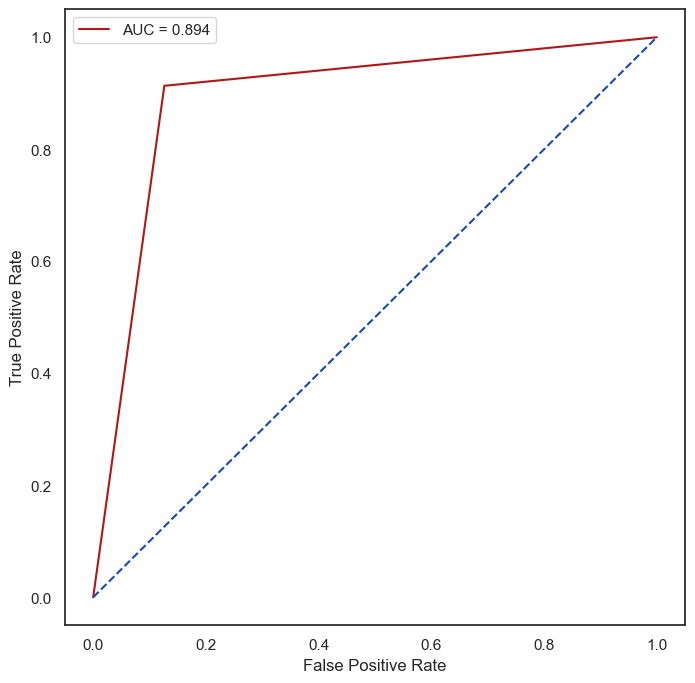

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

 Random Forest Classifier is: 0.9271904566022213
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1220
           1       0.91      0.95      0.93      1211

    accuracy                           0.93      2431
   macro avg       0.93      0.93      0.93      2431
weighted avg       0.93      0.93      0.93      2431



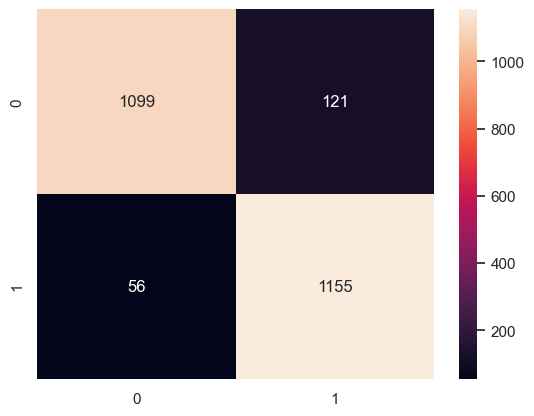

In [57]:
# Build the Random Forest Classifier and  evalute the model
# import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest Classifier
rfc = RandomForestClassifier()

#Train the model using the training sets
rfc.fit(X_train, y_train)

#Predict the response for test dataset
rfc_pred = rfc.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = rfc.score(x_test, y_test)
print(" Random Forest Classifier is:",acc)
report = classification_report(y_test, rfc_pred)
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)


In [58]:
new_row = {"Model Name":"Random Forest Classifier", "Accuracy Score":acc}
model_df = model_df.append(new_row, ignore_index=True)

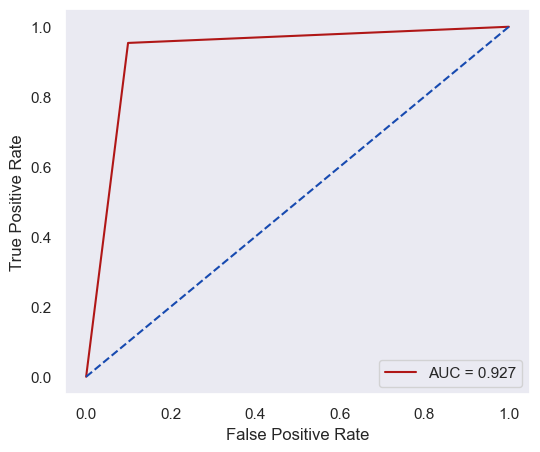

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'dark')
plt.figure(figsize = (6, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Ada Boosting classifier is: 0.8457424928013163
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1220
           1       0.83      0.87      0.85      1211

    accuracy                           0.85      2431
   macro avg       0.85      0.85      0.85      2431
weighted avg       0.85      0.85      0.85      2431



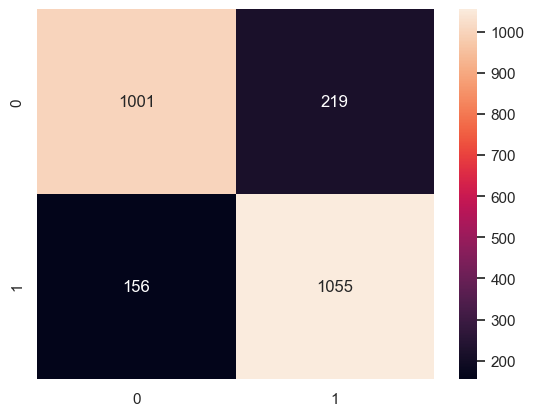

In [60]:
# Build the Ada Boosting Classifier and evaluate the model

abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1, 
                         random_state = 777)
#Train the model using the training sets
abc.fit(X_train, y_train)

#Predict the response for test dataset
abc_pred = abc.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = abc.score(x_test, y_test)
print("Ada Boosting classifier is:",acc)
report = classification_report(y_test, abc_pred)
cm = confusion_matrix(y_test, abc_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)

In [61]:
new_row = {"Model Name":"Ada Boosting Classifier", "Accuracy Score":acc}
model_df = model_df.append(new_row, ignore_index=True)

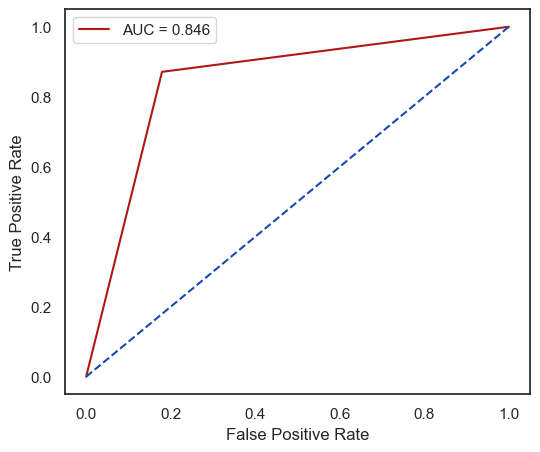

In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, abc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Gradient Boosting Classifier Model Accuracy score is: 0.872069107363225
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1220
           1       0.84      0.91      0.88      1211

    accuracy                           0.87      2431
   macro avg       0.87      0.87      0.87      2431
weighted avg       0.87      0.87      0.87      2431



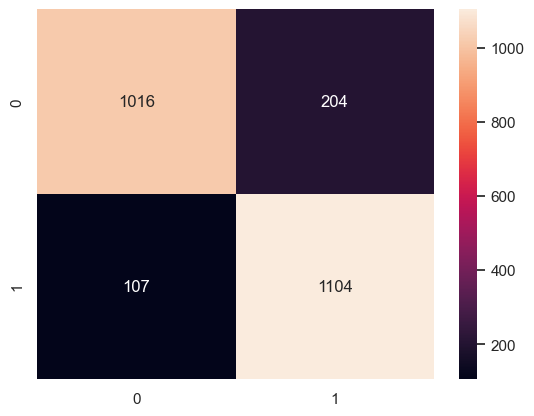

In [63]:
# Build Gradient Boosting Classifier and evaluate the model
gb = GradientBoostingClassifier()
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
gb_pred = gb.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = gb.score(x_test, y_test)
print("Gradient Boosting Classifier Model Accuracy score is:",acc)
report = classification_report(y_test, gb_pred)
cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)

In [64]:
new_row = {"Model Name":"Gradient Boosting Classifier", "Accuracy Score": acc}
model_df = model_df.append(new_row, ignore_index=True)

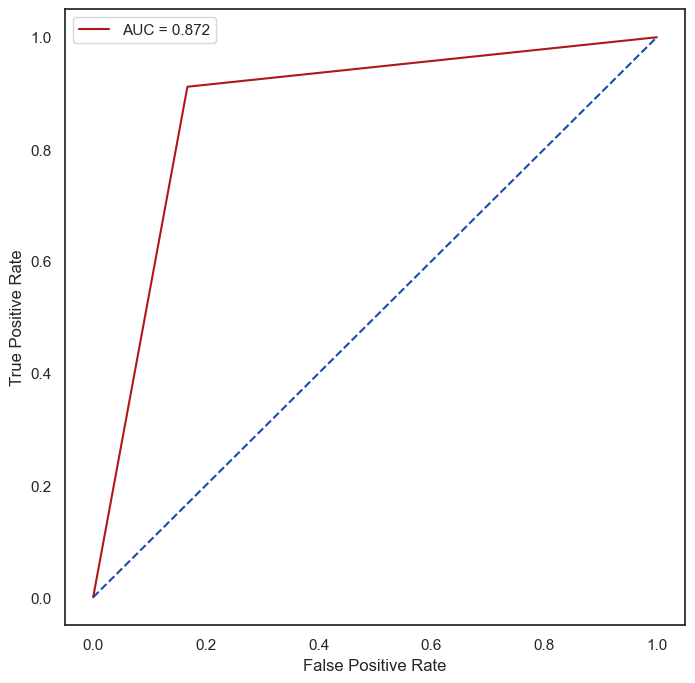

In [65]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gb_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

KNN Model Acuuracy is: 0.8552036199095022
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1220
           1       0.83      0.90      0.86      1211

    accuracy                           0.86      2431
   macro avg       0.86      0.86      0.86      2431
weighted avg       0.86      0.86      0.85      2431



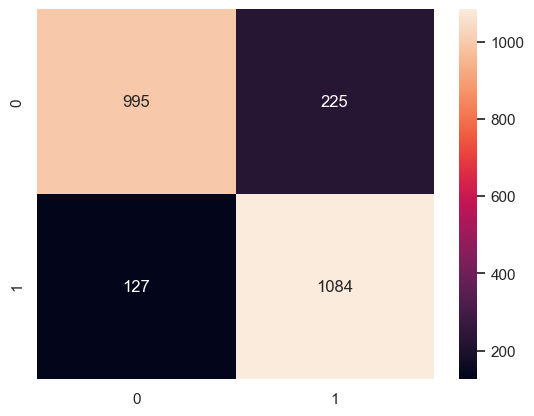

In [66]:
#Build KNN Model and evaluate the model

knn = KNeighborsClassifier(n_neighbors = 10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
knn_pred = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = knn.score(x_test, y_test)
print("KNN Model Acuuracy is:",acc)
report = classification_report(y_test, knn_pred)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)


In [67]:
new_row = {"Model Name":"KNeighbors Classifier", "Accuracy Score": acc}
model_df = model_df.append(new_row, ignore_index=True)

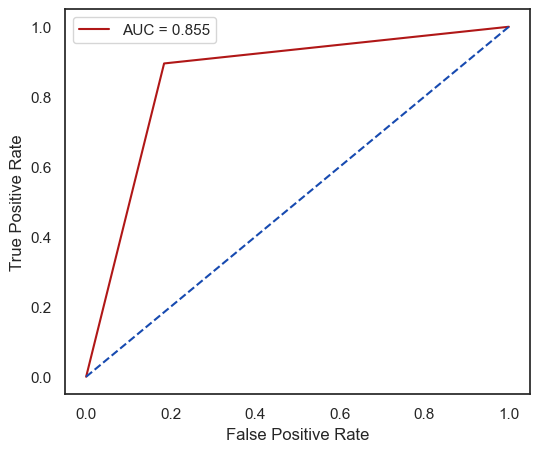

In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, knn_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

LogisticRegression accuracy score is: 0.8305224187577128
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1220
           1       0.82      0.85      0.83      1211

    accuracy                           0.83      2431
   macro avg       0.83      0.83      0.83      2431
weighted avg       0.83      0.83      0.83      2431



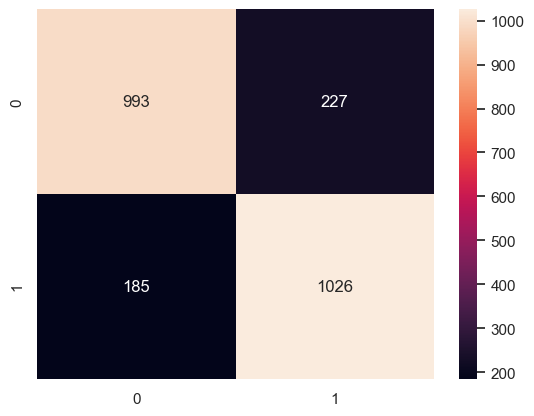

In [69]:
 #Build Logistic Regression Model and evaluate the model
    
lr = LogisticRegression()

#Train the model using the training sets
lr.fit(X_train, y_train)

#Predict the response for test dataset
lr_pred = lr.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = lr.score(x_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)


In [70]:
new_row = {"Model Name":"Logistic Regression", "Accuracy Score": acc}
model_df = model_df.append(new_row, ignore_index=True)

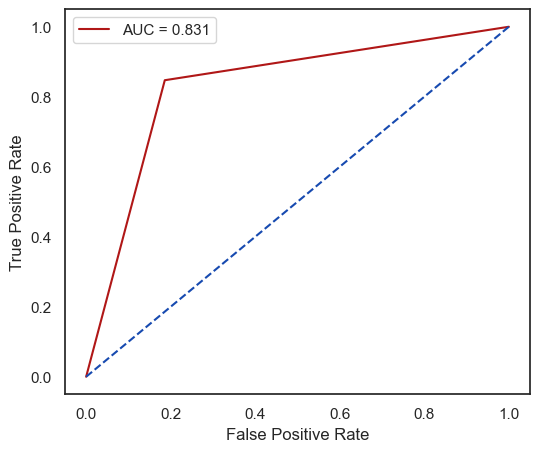

In [71]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

 Gaussian Naive Bayes is: 0.6787330316742082
              precision    recall  f1-score   support

           0       0.95      0.38      0.54      1220
           1       0.61      0.98      0.75      1211

    accuracy                           0.68      2431
   macro avg       0.78      0.68      0.65      2431
weighted avg       0.78      0.68      0.65      2431



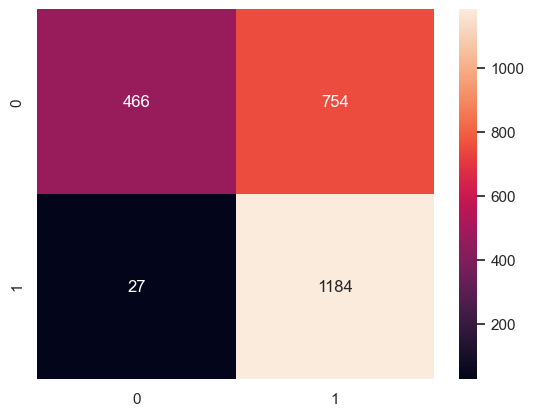

In [72]:
#Gaussian Naive Bayes
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier

gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
gnb_pred = gnb.predict(x_test)

# Model Accuracy, how often is the classifier correct
acc = gnb.score(x_test, y_test)
print(" Gaussian Naive Bayes is:",acc)
report = classification_report(y_test, gnb_pred)
cm = confusion_matrix(y_test, gnb_pred)
sns.heatmap(cm, annot = True, fmt="d")
print(report)

In [73]:
new_row = {"Model Name":"Gaussian Naive Bayes", "Accuracy Score": acc}
model_df = model_df.append(new_row, ignore_index=True)

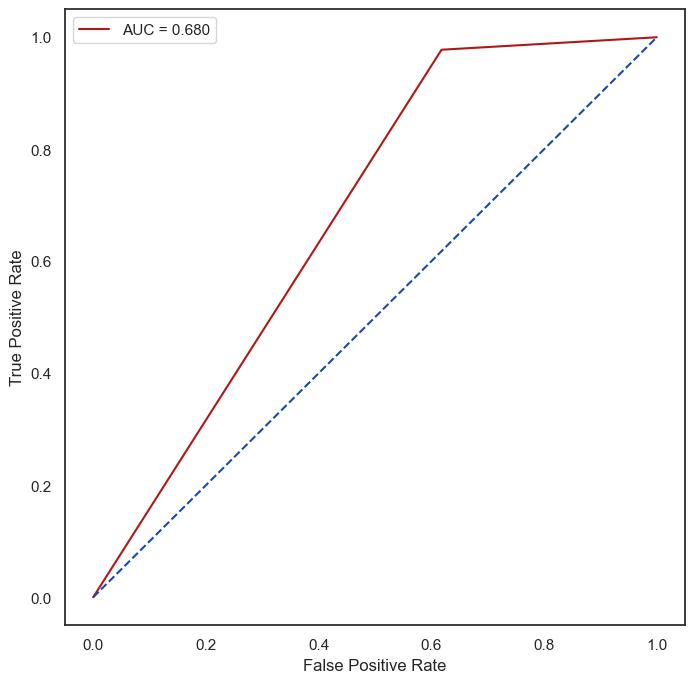

In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gnb_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [75]:
model_df.sort_values("Accuracy Score", ascending=False)

Model Name  Accuracy Score
3      Random Forest Classifier        0.927190
2      Decision Tree Classifier        0.893459
0                      XG BOOST        0.879885
5  Gradient Boosting Classifier        0.872069
1     Support Vector Classifier        0.863431
6         KNeighbors Classifier        0.855204
4       Ada Boosting Classifier        0.845742
7           Logistic Regression        0.830522
8          Gaussian Naive Bayes        0.678733

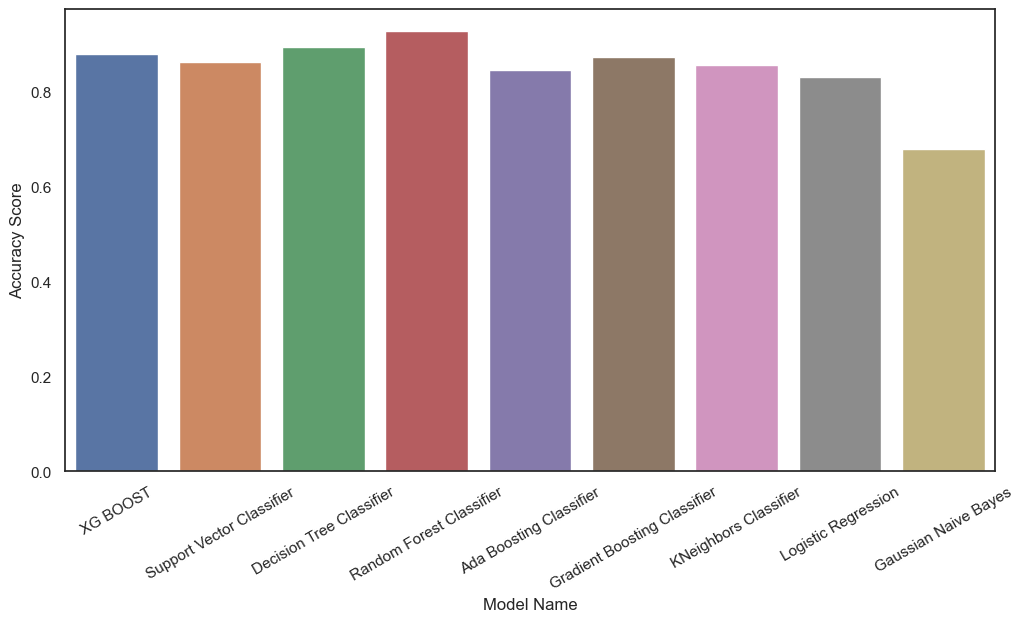

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x=model_df["Model Name"], y=model_df["Accuracy Score"])
plt.xticks(rotation=30)
plt.show()